# E3 REGRESIÓN

### Índice

1. **Limpieza y Exploración del Dataset**  
   - Eliminación de variables irrelevantes  
   - Análisis de correlaciones y PCA  
2. **Selección de Variables**  
   - Justificación y explicación de las variables seleccionadas  
3. **Modelos de Regresión**  
   - Regresión Lineal  
   - Regresión Polinómica  
   - Comparación y modelo ganador  
4. **Parte Optativa: Clasificación**  
   - Preparación de los datasets  
   - Algoritmo KNN en tres escenarios  
   - Comparación de resultados  
5. **Conclusiones Generales**


In [178]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [144]:
file_name = "nba_players_data.csv" 
try:
    nba_data = pd.read_csv(file_name)
    print("Dataset de NBA cargado con éxito")
except FileNotFoundError:
    print(f"No se encontró el archivo.")

Dataset de NBA cargado con éxito


## 1. **Limpieza y Exploración del Dataset**  

In [145]:
print("\nInformación del dataset:")
print(nba_data.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12844 non-null  int64  
 1   player_name        12844 non-null  object 
 2   team_abbreviation  12844 non-null  object 
 3   age                12844 non-null  float64
 4   player_height      12844 non-null  float64
 5   player_weight      12844 non-null  float64
 6   college            10990 non-null  object 
 7   country            12844 non-null  object 
 8   draft_year         12844 non-null  object 
 9   draft_round        12844 non-null  object 
 10  draft_number       12844 non-null  object 
 11  gp                 12844 non-null  int64  
 12  pts                12844 non-null  float64
 13  reb                12844 non-null  float64
 14  ast                12844 non-null  float64
 15  net_rating         12844 non-null  float64
 

### Lista de variables con rangos, tipo y aptitud para clasificación

- **Unnamed: 0**: Índice numérico (irrelevante para el análisis).  
  - **Tipo**: Numérico (entero).  

- **player_name**: Nombre único de cada jugador.  
  - **Tipo**: Categórico (texto).

- **team_abbreviation**: Código de tres letras para el equipo del jugador.  
  - **Tipo**: Categórico.  

- **age**: Edad de los jugadores (rango: 18-44 años, media: 27).  
  - **Tipo**: Numérico (continuo).  

- **player_height**: Altura de los jugadores en cm (rango: 160-231 cm, media: 200 cm).  
  - **Tipo**: Numérico (continuo).  

- **player_weight**: Peso de los jugadores en kg (rango: 60-163 kg, media: 100 kg).  
  - **Tipo**: Numérico (continuo).
    
- **college**: Universidad del jugador (faltante en ~15% de los datos).  
  - **Tipo**: Categórico (texto).  

- **country**: País de origen, siendo la mayoría de USA.  
  - **Tipo**: Categórico.  

- **draft_year**: Año del draft (1930 a 2021).  
  - **Tipo**: Numérico (entero).  

- **draft_round**: Ronda del draft (1 a 2; algunos no seleccionados).  
  - **Tipo**: Categórico.  

- **draft_number**: Posición en el draft (1 a 60; algunos no seleccionados).  
  - **Tipo**: Numérico (entero).  

- **gp**: Juegos jugados (rango: 1-85, media: 51).  
  - **Tipo**: Numérico (continuo).  

- **pts**: Puntos por partido (rango: 0-36, media: 8.2).  
  - **Tipo**: Numérico (continuo).  

- **reb**: Rebotes por partido (rango: 0-16.3, media: 3.6).  
  - **Tipo**: Numérico (continuo).  

- **ast**: Asistencias por partido (rango: 0-11.7, media: 1.8).  
  - **Tipo**: Numérico (continuo).  

- **net_rating**: Valoración neta (-250 a 300, media: -2.2).  
  - **Tipo**: Numérico (continuo).  

- **oreb_pct**: Porcentaje de rebotes ofensivos (0% a 10%, media: 5.4%).  
  - **Tipo**: Numérico (continuo).  

- **dreb_pct**: Porcentaje de rebotes defensivos (0% a 10%, media: 14.6%).  
  - **Tipo**: Numérico (continuo).  

- **usg_pct**: Porcentaje de uso del jugador en el equipo (0% a 100%, media: 18.4%).  
  - **Tipo**: Numérico (continuo).  

- **ts_pct**: Porcentaje de tiros efectivos (rango: 0-150%, media: 51.3%).  
  - **Tipo**: Numérico (continuo).  

- **ast_pct**: Porcentaje de asistencias (rango: 0-94%, media: 13.1%).  
  - **Tipo**: Numérico (continuo).  

- **season**: Temporada en formato 1996-97, abarcando más de dos décadas.
  - **Tipo**: Categórico.


In [146]:
dirk_college = nba_data[nba_data['player_name'] == "Dirk Nowitzki"]['college']
print("Dirk Nowitzki - College:", dirk_college)

Dirk Nowitzki - College: 881      NaN
1752     NaN
2004     NaN
2406     NaN
3024     NaN
3245     NaN
3938     NaN
4384     NaN
4767     NaN
4938     NaN
5424     NaN
5977     NaN
6428     NaN
6911     NaN
7346     NaN
7816     NaN
8370     NaN
8632     NaN
9525     NaN
9965     NaN
10233    NaN
Name: college, dtype: object


#### Observaciones

- Al haber trabajdo ya con este dataset, utilicé a Dirk Nowitzki como prueba, ya que es un jugador que jugó muchos años en la NBA y no asistió a la universidad. Al filtrar sus datos, vemos que seguramente los valores faltantes en la columna `college` corresponden a jugadores que no asistieron a la universidad. 
- Además, observamos que cada fila del dataset representa una temporada de un jugador, no un jugador único. VAloraremos si este es útil o no.


In [147]:
nba_data['college'].fillna('No College', inplace=True)
print("\nInformación del dataset:")
print(nba_data.college.info())


Información del dataset:
<class 'pandas.core.series.Series'>
RangeIndex: 12844 entries, 0 to 12843
Series name: college
Non-Null Count  Dtype 
--------------  ----- 
12844 non-null  object
dtypes: object(1)
memory usage: 100.5+ KB
None


Confirmamos que los valores faltantes en la columna `college` corresponden a jugadores que no asistieron a la universidad

Matriz de correlación:
                    age  player_height  player_weight       pts       reb  \
age            1.000000      -0.007904       0.063561  0.011353  0.037386   
player_height -0.007904       1.000000       0.822141 -0.055284  0.424220   
player_weight  0.063561       0.822141       1.000000 -0.025023  0.438112   
pts            0.011353      -0.055284      -0.025023  1.000000  0.624509   
reb            0.037386       0.424220       0.438112  0.624509  1.000000   
ast            0.092359      -0.442781      -0.371675  0.664320  0.247841   
net_rating     0.092896      -0.003074       0.003547  0.215199  0.187820   
oreb_pct      -0.055228       0.589538       0.599511 -0.125164  0.407960   
dreb_pct       0.018774       0.614273       0.605639  0.055669  0.611899   
usg_pct       -0.113882      -0.104011      -0.065811  0.641469  0.232968   
ts_pct         0.025245       0.076797       0.070992  0.373439  0.313451   
ast_pct        0.069029      -0.608696      -0.521939

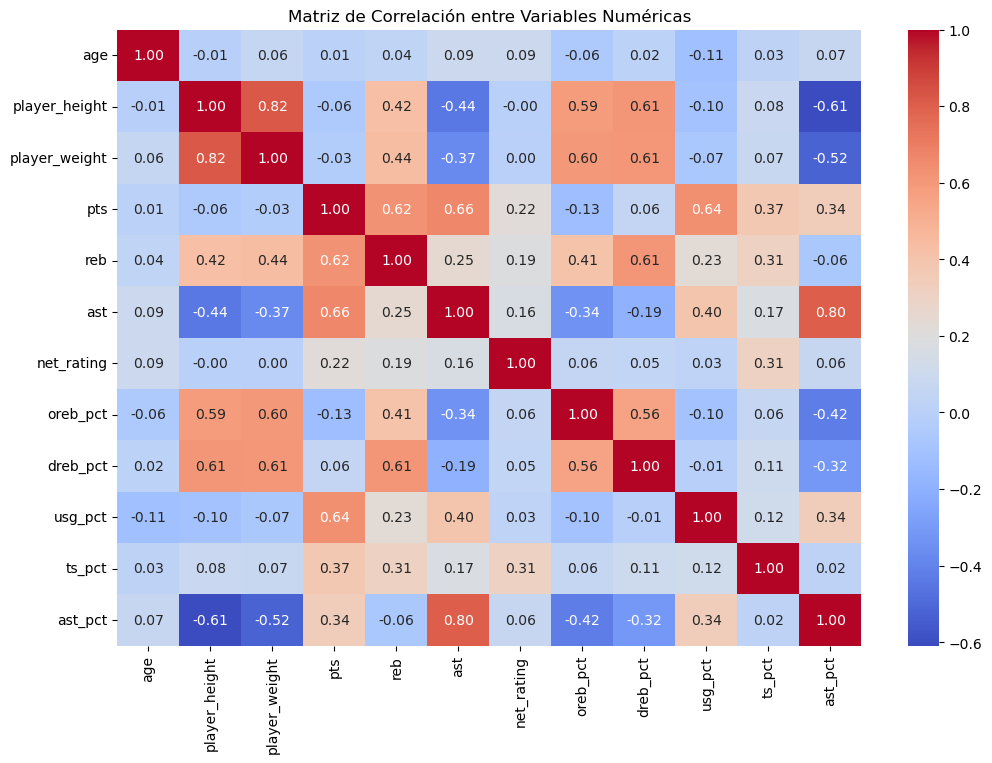

In [148]:
# Filtrar solo las columnas numéricas
numerical_columns = nba_data.select_dtypes(include=['float64']).columns

# Calcular la matriz de correlación usando solo las columnas numéricas
correlation_matrix = nba_data[numerical_columns].corr()

# Mostrar las correlaciones en forma tabular (opcional)
print("Matriz de correlación:")
print(correlation_matrix)

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()


### Correlación para elegir variables y limpiar el dataset

Hacemos esta matriz para ver qué variables están relacionadas y decidir cuáles usar. Esto también ayuda a limpiar el dataset eliminando variables menos útiles.

1. **`pts` (puntos):**
   - Más puntos se relacionan con más asistencias (`ast`: 0.66), uso en el equipo (`usg_pct`: 0.64), y rebotes (`reb`: 0.62).

2. **`reb` (rebotes):**
   - Más rebotes se relacionan con altura (`player_height`: 0.42) y porcentaje de rebotes defensivos (`dreb_pct`: 0.61).

3. **Variables menos relacionadas:**
   - `age` (edad) y `net_rating` tienen poca relación con otras estadísticas.

4. **Variable a predecir:**
   - La variable que usaremos para predecir será `pts` (puntos por partido).

In [149]:
# Verificar el valor de Fred VanVleet en draft_number
fred_vanvleet = nba_data[nba_data['player_name'] == "Fred VanVleet"]
print("Fred VanVleet - Draft Number:", fred_vanvleet['draft_number'].unique())

Fred VanVleet - Draft Number: ['Undrafted']


In [150]:
# Eliminar columnas irrelevantes
nba_data.drop(columns=["Unnamed: 0", "player_name", "college", "team_abbreviation", 
                       "country", "draft_year", "draft_round", "season"], inplace=True, errors="ignore")

# Codificar draft_number (asumiendo que undrafted es representado como 'Undrafted' como en el caso de VanVleet)
nba_data['draft_number'] = nba_data['draft_number'].replace('Undrafted', '61').astype(int)

# Revisar valores faltantes después de la transformación
print("Valores faltantes tras limpieza:")
print(nba_data.isnull().sum())

Valores faltantes tras limpieza:
age              0
player_height    0
player_weight    0
draft_number     0
gp               0
pts              0
reb              0
ast              0
net_rating       0
oreb_pct         0
dreb_pct         0
usg_pct          0
ts_pct           0
ast_pct          0
dtype: int64


In [151]:
# Calcular correlación con 'pts'
correlation_with_pts = nba_data.corr()['pts'].sort_values(ascending=False)
print("Correlaciones con 'pts':")
print(correlation_with_pts)


Correlaciones con 'pts':
pts              1.000000
ast              0.664320
usg_pct          0.641469
reb              0.624509
gp               0.536003
ts_pct           0.373439
ast_pct          0.337339
net_rating       0.215199
dreb_pct         0.055669
age              0.011353
player_weight   -0.025023
player_height   -0.055284
oreb_pct        -0.125164
draft_number    -0.439135
Name: pts, dtype: float64


Varianza explicada por cada componente principal:
Componente 1: 29.90% (Varianza acumulada: 29.90%)
Componente 2: 21.30% (Varianza acumulada: 51.19%)
Componente 3: 9.51% (Varianza acumulada: 60.70%)
Componente 4: 7.91% (Varianza acumulada: 68.61%)
Componente 5: 6.29% (Varianza acumulada: 74.90%)
Componente 6: 5.52% (Varianza acumulada: 80.42%)
Componente 7: 5.19% (Varianza acumulada: 85.61%)
Componente 8: 3.97% (Varianza acumulada: 89.58%)
Componente 9: 3.33% (Varianza acumulada: 92.92%)
Componente 10: 3.00% (Varianza acumulada: 95.92%)
Componente 11: 1.89% (Varianza acumulada: 97.81%)
Componente 12: 1.27% (Varianza acumulada: 99.08%)
Componente 13: 0.92% (Varianza acumulada: 100.00%)

Contribución de las variables a cada componente principal:
      player_height  player_weight  oreb_pct  dreb_pct   ast_pct       ast  \
PC1        0.455134       0.441176  0.388253  0.386513  0.364580  0.275074   
PC2        0.001521       0.030824  0.010355  0.138945  0.262568  0.424063   
PC3        0

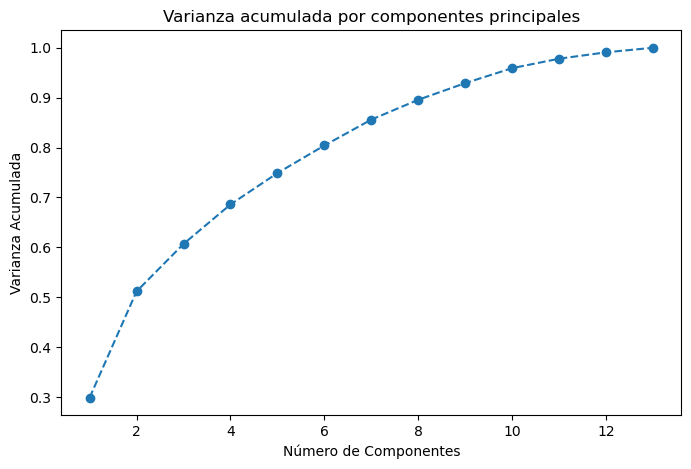

In [152]:
# Variables independientes
X = nba_data.drop(columns=['pts'])

# Estandarizar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=len(X.columns))
X_pca = pca.fit_transform(X_scaled)

# Varianza explicada por componente
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Mostrar varianza explicada
print("Varianza explicada por cada componente principal:")
for i, var in enumerate(explained_variance, 1):
    print(f"Componente {i}: {var:.2%} (Varianza acumulada: {cumulative_variance[i-1]:.2%})")

# Cargar componentes principales en un DataFrame
components_df = pd.DataFrame(pca.components_, columns=X.columns, index=[f"PC{i}" for i in range(1, len(X.columns) + 1)])

# Mostrar contribuciones absolutas de cada variable a las componentes
print("\nContribución de las variables a cada componente principal:")
print(components_df.abs().sort_values(by="PC1", axis=1, ascending=False))
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza acumulada por componentes principales')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada')
plt.show()

In [153]:
# Selección final de variables
selected_features = ['ast', 'usg_pct', 'reb', 'gp', 'draft_number', 'ts_pct']
nba_selected = nba_data[selected_features + ['pts']]  # Mantener 'pts' como objetivo

# Verificar el dataset seleccionado
print(nba_selected.head())


   ast  usg_pct  reb  gp  draft_number  ts_pct   pts
0  2.4    0.169  1.5  64            42   0.487   3.9
1  0.3    0.174  1.3   4            34   0.497   3.8
2  1.9    0.175  6.4  41            12   0.512   8.3
3  1.7    0.206  2.8  64             7   0.527  10.2
4  0.3    0.195  1.7  52            22   0.500   2.8


## 2. **Selección de Variables**
   
Hemos seleccionado las variables basándonos en **correlaciones** y **PCA**. Las variables elegidas tienen relaciones fuertes con `pts` o contribuyen significativamente a las principales componentes del PCA, lo que indica que explican gran parte de la variabilidad en los datos.

### Variables seleccionadas y su explicación

1. **`ast` (asistencias):**
   - Alta correlación con `pts` (**0.664**).
   - Contribuye a PC2 (**0.424**), relacionada con el rendimiento.

2. **`usg_pct` (uso en el equipo):**
   - Alta correlación con `pts` (**0.641**).
   - Importante en PC2 (**0.309**) por el impacto en el rendimiento.

3. **`reb` (rebotes):**
   - Alta correlación con `pts` (**0.624**).
   - Contribuye a PC2 (**0.421**), reflejando el impacto en el juego.

4. **`gp` (juegos jugados):**
   - Moderada correlación con `pts` (**0.536**).
   - Contribuye significativamente a PC2 (**0.421**).

5. **`draft_number` (posición en el draft):**
   - Buena correlación negativa con `pts` (**-0.439**).
   - Contribuye a PC2 (**0.352**), lo que refuerza su relación con el rendimiento.

6. **`ts_pct` (eficiencia de tiro, opcional):**
   - Moderada correlación con `pts` (**0.373**).
   - Aparece en varias componentes del PCA como factor complementario.

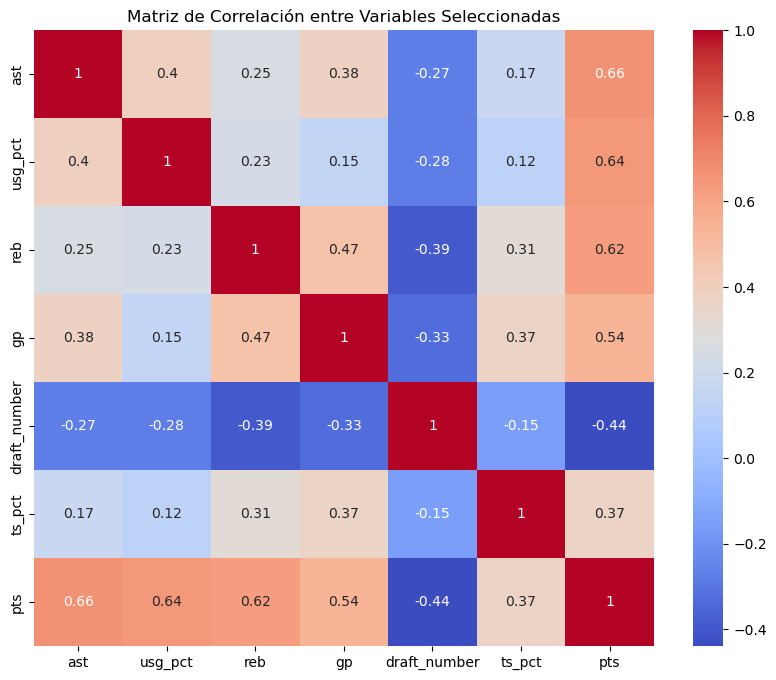

In [154]:
# Crear tabla de correlación
correlation_matrix2 = nba_selected.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación entre Variables Seleccionadas")
plt.show()

### Justificación de la matriz de correlación

La matriz muestra que las correlaciones más altas están entre las variables seleccionadas y `pts`, la variable que queremos predecir. Esto es positivo porque indica que las variables elegidas (como `ast`, `usg_pct`, `reb`, y `gp`) tienen relaciones significativas con los puntos.

Las correlaciones entre las variables independientes son moderadas y no representan un problema. Esto sugiere que cada una aporta información única al modelo.


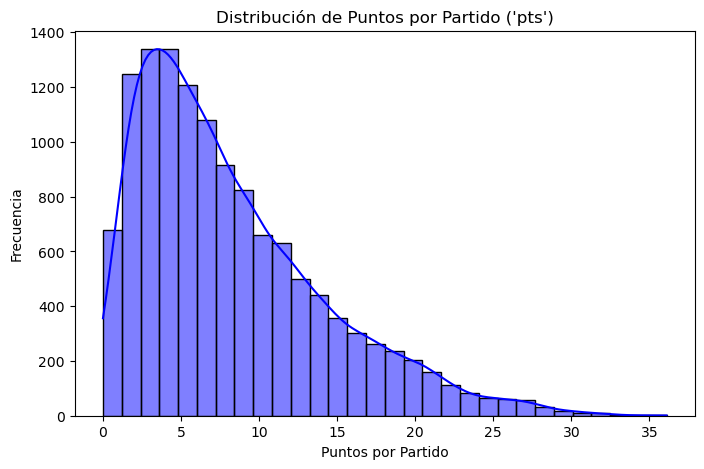

Estadísticas descriptivas de 'pts':
count    12844.000000
mean         8.212582
std          6.016573
min          0.000000
25%          3.600000
50%          6.700000
75%         11.500000
max         36.100000
Name: pts, dtype: float64


In [155]:
# Histograma y densidad de 'pts'
plt.figure(figsize=(8, 5))
sns.histplot(nba_data['pts'], kde=True, bins=30, color='blue')
plt.title("Distribución de Puntos por Partido ('pts')")
plt.xlabel("Puntos por Partido")
plt.ylabel("Frecuencia")
plt.show()
print("Estadísticas descriptivas de 'pts':")
print(nba_data['pts'].describe())

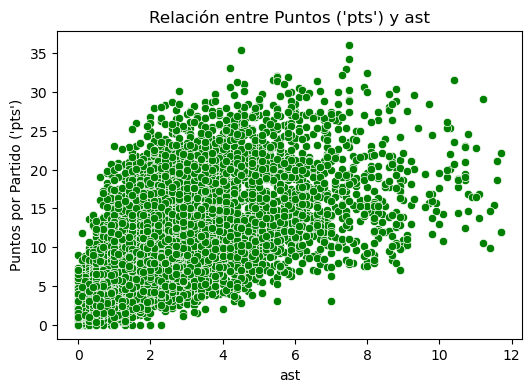

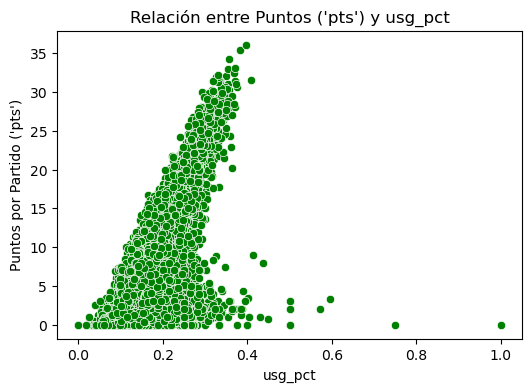

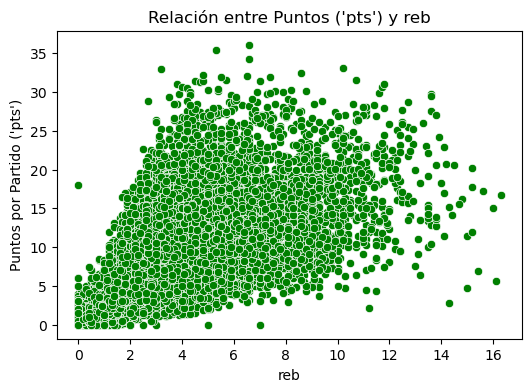

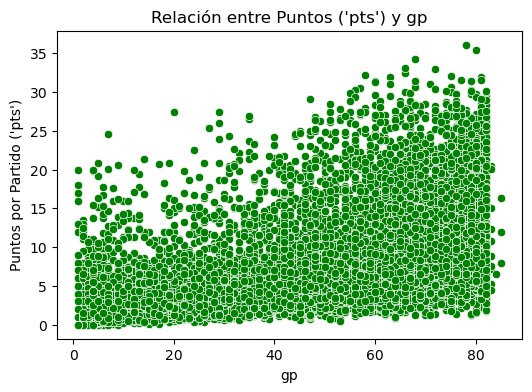

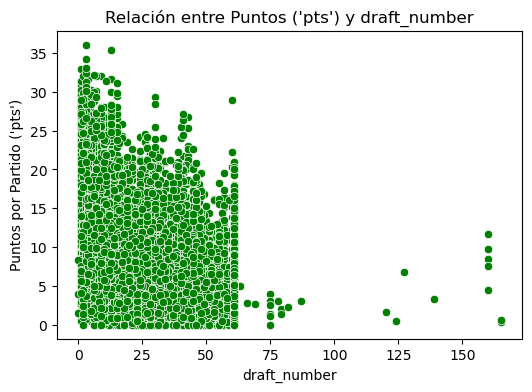

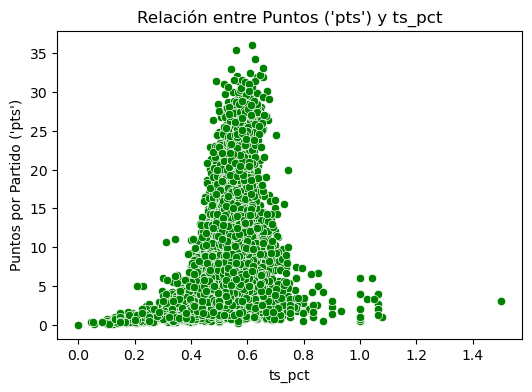

In [156]:
# Relación entre 'pts' y las principales variables independientes
selected_features = ['ast', 'usg_pct', 'reb', 'gp', 'draft_number', 'ts_pct']

for feature in selected_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=nba_data[feature], y=nba_data['pts'], color='green')
    plt.title(f"Relación entre Puntos ('pts') y {feature}")
    plt.xlabel(feature)
    plt.ylabel("Puntos por Partido ('pts')")
    plt.show()


### Análisis de gráficos

1. **Distribución de `pts`:**
   - Sesgada a la derecha. La mayoría anota menos de 10 puntos.

2. **Relaciones principales:**
   - **`ast`, `usg_pct`, `reb` y `gp`:** Relación positiva con `pts`.
   - **`draft_number`:** Relación negativa con `pts`.
   - **`ts_pct`:** Relación no lineal, se estabiliza en valores altos.


#### **(eliminar datos para parte opcional)**

In [197]:
# copia ds original completo
dataset_original = nba_selected.copy()

# ¡porcentaje de datos a eliminar
percentage_to_remove = 0.1  # 10%

# muestras eliminar
n_samples_to_remove = int(len(nba_selected) * percentage_to_remove)

np.random.seed(42)  # Asegurar reproducibilidad
indices_to_remove = np.random.choice(nba_selected.index, n_samples_to_remove, replace=False)

nba_selected.loc[indices_to_remove, 'pts'] = np.nan

# verificar cuántos valores faltan ahora
print("Valores faltantes en 'pts' después de eliminar:")
print(nba_selected['pts'].isnull().sum())

Valores faltantes en 'pts' después de eliminar:
1284


## 3. **Modelos de Regresión**  

In [158]:
# Eliminar filas con 'pts' faltante para entrenar el modelo
nba_cleaned = nba_selected.dropna(subset=['pts'])

# Variables independientes y dependiente
X = nba_cleaned.drop(columns='pts')
y = nba_cleaned['pts']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predicciones
y_pred_train = linear_model.predict(X_train)
y_pred_test = linear_model.predict(X_test)

# Métricas de evaluación
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
r2 = r2_score(y_test, y_pred_test)

print(f"RMSE en entrenamiento: {train_rmse}")
print(f"RMSE en prueba: {test_rmse}")
print(f"R² en prueba: {r2}")


RMSE en entrenamiento: 2.617683111388928
RMSE en prueba: 2.513652395199403
R² en prueba: 0.8290114799857573


/tmp/ipykernel_146/4291036648.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


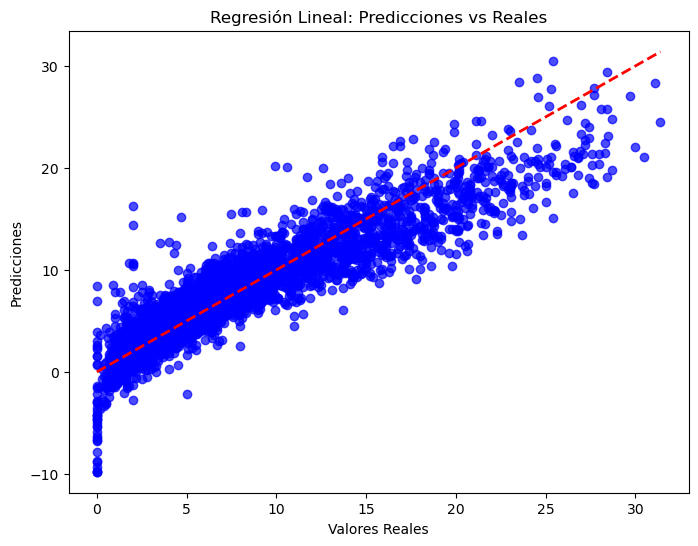

In [159]:
# Predicciones vs valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal: Predicciones vs Reales")
plt.show()


In [160]:
for feature, coef in zip(X.columns, linear_model.coef_):
    print(f"{feature}: {coef}")

ast: 1.1522727250013935
usg_pct: 41.807667435374505
reb: 0.8003063435034918
gp: 0.03210639960207118
draft_number: -0.016056624122469998
ts_pct: 6.218921225551024


   - **`usg_pct` (41.81):** La mayor influencia en los puntos.
   - **`ts_pct` (6.22):** Relación positiva con los puntos.
   - **`ast` (1.15):** Impacto moderado en los puntos.
   - **`reb` (0.80):** Relación positiva pero más baja.
   - **`gp` (0.03):** Influencia pequeña.
   - **`draft_number` (-0.016):** Relación negativa, como era esperado.

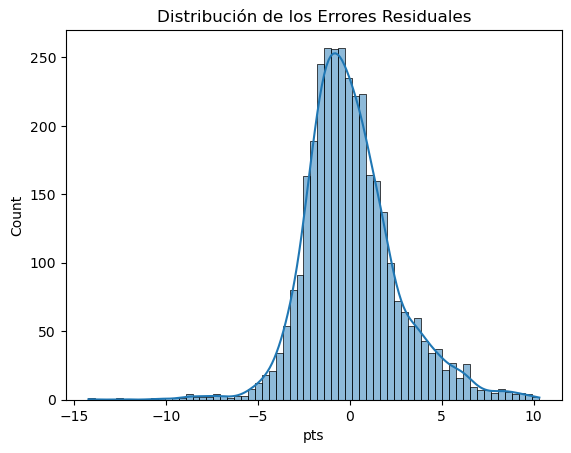

In [161]:
residuals = y_test - y_pred_test
sns.histplot(residuals, kde=True)
plt.title("Distribución de los Errores Residuales")
plt.show()


Los errores están distribuidos de forma cercana a la normal, lo cual es positivo. 

### Conclusión y resultados

- **RMSE en prueba (2.51):** El modelo tiene un error promedio bajo, lo que indica buen ajuste.
- **R² en prueba (0.83):** Explica el 83% de la variación de los puntos por partido.
- **Gráfico:** La mayoría de las predicciones están alineadas con los valores reales, pero hay algunos errores en valores extremos.

El modelo tiene buen desempeño y los coeficientes son coherentes con lo esperado. **`usg_pct`** y **`ts_pct`** son las variables más importantes.



In [162]:
# Crear un pipeline para la regresión polinómica
degree = 2  # Grado del polinomio
polynomial_model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=degree, include_bias=False)),
    ('linear_regression', LinearRegression())
])

# Entrenar el modelo con las mismas divisiones de entrenamiento y prueba
polynomial_model.fit(X_train, y_train)

# Predicciones
y_pred_train_poly = polynomial_model.predict(X_train)
y_pred_test_poly = polynomial_model.predict(X_test)

# Métricas de evaluación
train_rmse_poly = mean_squared_error(y_train, y_pred_train_poly, squared=False)
test_rmse_poly = mean_squared_error(y_test, y_pred_test_poly, squared=False)
r2_poly = r2_score(y_test, y_pred_test_poly)

print(f"RMSE en entrenamiento (polinómica): {train_rmse_poly}")
print(f"RMSE en prueba (polinómica): {test_rmse_poly}")
print(f"R² en prueba (polinómica): {r2_poly}")

RMSE en entrenamiento (polinómica): 1.7126121285793532
RMSE en prueba (polinómica): 1.7044468396068104
R² en prueba (polinómica): 0.9213817389327892


/tmp/ipykernel_146/995890098.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


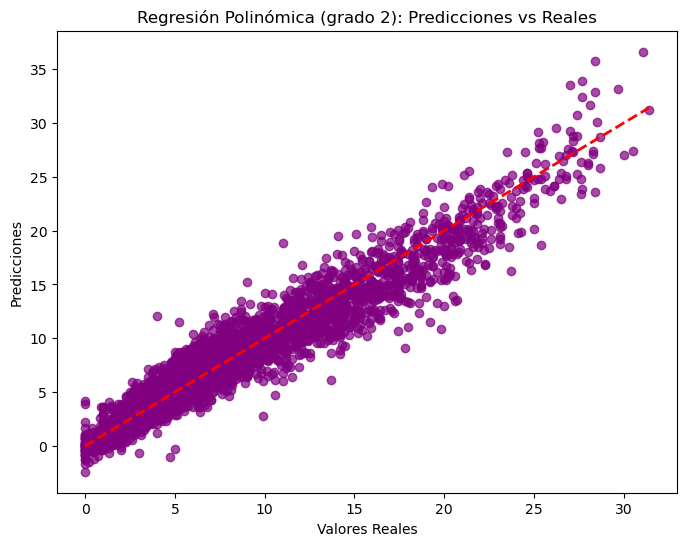

In [163]:
# Gráfico de predicciones vs valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test_poly, alpha=0.7, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title(f"Regresión Polinómica (grado {degree}): Predicciones vs Reales")
plt.show()

In [164]:
# Obtener los coeficientes del modelo
coef_poly = polynomial_model.named_steps['linear_regression'].coef_
features_poly = polynomial_model.named_steps['poly_features'].get_feature_names_out(X_train.columns)

# Mostrar la importancia de cada término
for feature, coef in zip(features_poly, coef_poly):
    print(f"{feature}: {coef}")


ast: -0.5479641991704732
usg_pct: 1.2218750899897144
reb: 0.504414472409588
gp: -0.13798398165653947
draft_number: 0.03995856839351682
ts_pct: -0.5313325526418042
ast^2: -0.16974521578491064
ast usg_pct: 6.169171714289605
ast reb: -0.05667310765542206
ast gp: -0.004129580531928943
ast draft_number: -0.0018287985333388542
ast ts_pct: 3.571884537076769
usg_pct^2: 4.671622524148395
usg_pct reb: 3.5081008691828424
usg_pct gp: 0.36134633890448126
usg_pct draft_number: -0.19570399932291527
usg_pct ts_pct: 18.50261573687418
reb^2: -0.053157858452307874
reb gp: -0.003054794054855592
reb draft_number: 0.0011269915465052169
reb ts_pct: 0.5076660721340662
gp^2: 0.00033918174403591017
gp draft_number: -0.00011899764911877178
gp ts_pct: 0.1591970212888145
draft_number^2: 2.5316073603010025e-05
draft_number ts_pct: -0.021525211171814825
ts_pct^2: -0.6959946510098491


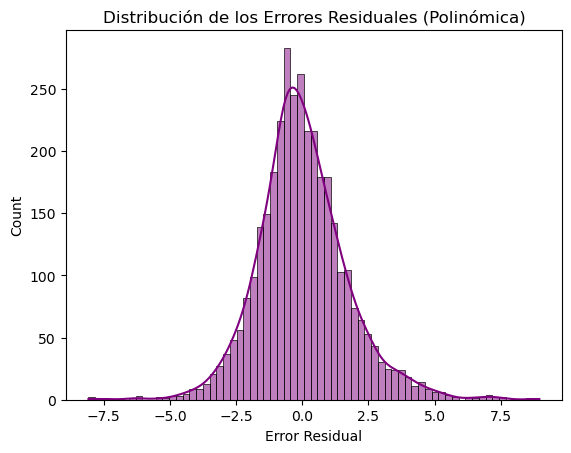

In [165]:
residuals_poly = y_test - y_pred_test_poly

# Histograma de los errores residuales
import seaborn as sns
sns.histplot(residuals_poly, kde=True, color="purple")
plt.title("Distribución de los Errores Residuales (Polinómica)")
plt.xlabel("Error Residual")
plt.show()


### Conclusiones de la Regresión Polinómica

1. **Resultados del modelo:**
   - **RMSE en prueba:** 1.70, menor que en la regresión lineal, lo que indica mayor precisión.
   - **R² en prueba:** explica el 92% de la variabilidad en los puntos, mejorando el ajuste respecto al modelo lineal.

2. **Coeficientes principales:**
   - **`usg_pct` y `ts_pct`:** Variables clave con fuerte impacto positivo, incluyendo interacciones como `usg_pct ts_pct`.
   - **Relaciones cuadráticas (`usg_pct^2`):** Capturan relaciones no lineales importantes.


/tmp/ipykernel_146/3218098856.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
/tmp/ipykernel_146/3218098856.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


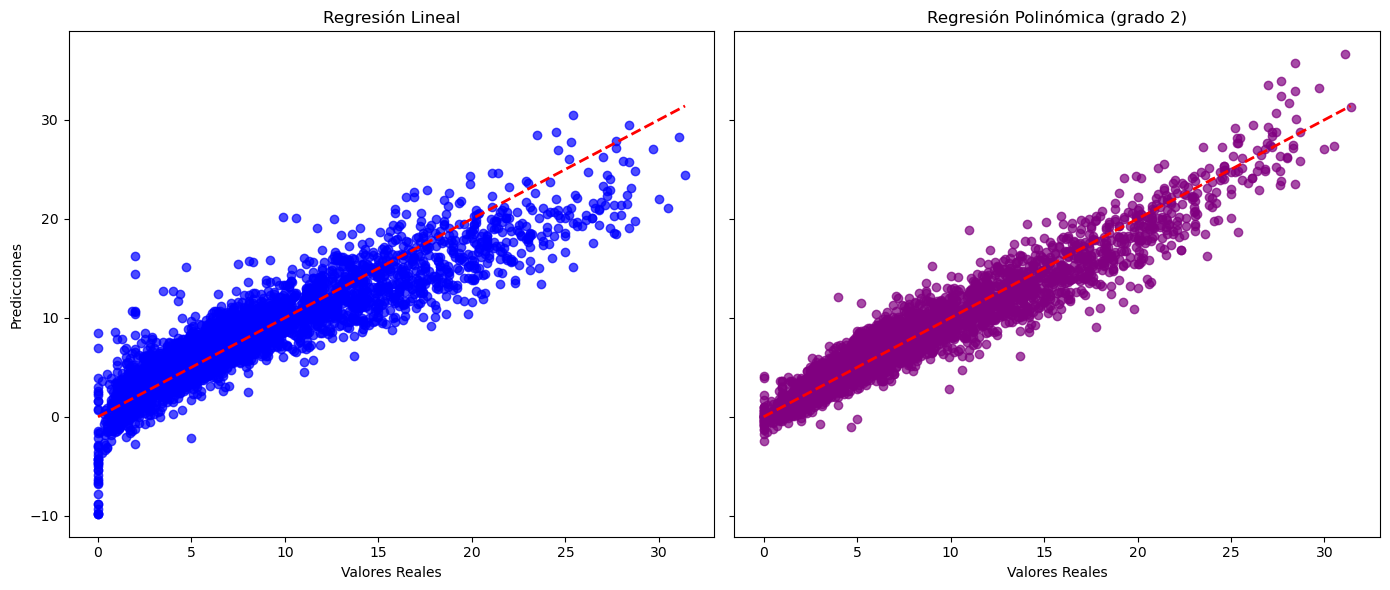

In [166]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Gráfico de regresión lineal
axes[0].scatter(y_test, y_pred_test, alpha=0.7, color='blue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
axes[0].set_title("Regresión Lineal")
axes[0].set_xlabel("Valores Reales")
axes[0].set_ylabel("Predicciones")

# Gráfico de regresión polinómica
axes[1].scatter(y_test, y_pred_test_poly, alpha=0.7, color='purple')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
axes[1].set_title(f"Regresión Polinómica (grado {degree})")
axes[1].set_xlabel("Valores Reales")

plt.tight_layout()
plt.show()


### Modelo Ganador

Después de analizar los resultados, seleccionamos la **Regresión Polinómica** como el modelo ganador. Aunque ambos modelos (lineal y polinómico) tienen tiempos de ejecución rápidos, el modelo polinómico ofrece mejores resultados, con un **RMSE más bajo** (1.70 vs. 2.51) y un **R² más alto** (0.92 vs. 0.83). Esto demuestra que el modelo polinómico captura mejor las relaciones complejas en los datos, lo que lo hace más adecuado para nuestro problema.


---

## 4. **Parte Optativa: Clasificación**
   
### Creación de los tres datasets

Preparamos tres datasets para comparar resultados: 
1. **Dataset sin datos faltantes:** Eliminamos las filas con `pts` vacío. 
2. **Dataset con valores rellenados:** Usamos la regresión polinómica para estimar y rellenar los valores faltantes de `pts`.
3. **Dataset original completo:** Mantuvimos el dataset inicial sin modificar los valores faltantes.


In [167]:
# Dataset con datos eliminados
dataset_no_missing = nba_selected.dropna(subset=['pts'])

print("Dataset con datos eliminados:")
print(dataset_no_missing.info())


Dataset con datos eliminados:
<class 'pandas.core.frame.DataFrame'>
Index: 11560 entries, 0 to 12843
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ast           11560 non-null  float64
 1   usg_pct       11560 non-null  float64
 2   reb           11560 non-null  float64
 3   gp            11560 non-null  int64  
 4   draft_number  11560 non-null  int64  
 5   ts_pct        11560 non-null  float64
 6   pts           11560 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 722.5 KB
None


In [171]:
# Crear una copia del DataFrame original antes de añadir 'pts_filled'
nba_cleaned = nba_selected.drop(columns=['pts_filled'], errors='ignore')

# Identificar índices con valores faltantes en 'pts'
missing_indices = nba_cleaned[nba_cleaned['pts'].isna()].index

# Preparar los datos sin la columna 'pts' para predicciones
X_missing = nba_cleaned.loc[missing_indices].drop(columns=['pts'])

# Hacer predicciones
predicted_values = polynomial_model.predict(X_missing)

# Rellenar los valores faltantes en una nueva columna
nba_selected.loc[missing_indices, 'pts_filled'] = predicted_values

# Crear el dataset rellenado
dataset_filled = nba_selected.copy()

print("Dataset con datos rellenados:")
print(dataset_filled.info())


Dataset con datos rellenados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ast           12844 non-null  float64
 1   usg_pct       12844 non-null  float64
 2   reb           12844 non-null  float64
 3   gp            12844 non-null  int64  
 4   draft_number  12844 non-null  int64  
 5   ts_pct        12844 non-null  float64
 6   pts           11560 non-null  float64
 7   pts_filled    12844 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 802.9 KB
None


In [172]:
# Eliminar la columna 'pts' y renombrar 'pts_filled' a 'pts'
dataset_filled = dataset_filled.drop(columns=['pts']).rename(columns={'pts_filled': 'pts'})

# Verificar los cambios
print("Dataset simplificado:")
print(dataset_filled.info())


Dataset simplificado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ast           12844 non-null  float64
 1   usg_pct       12844 non-null  float64
 2   reb           12844 non-null  float64
 3   gp            12844 non-null  int64  
 4   draft_number  12844 non-null  int64  
 5   ts_pct        12844 non-null  float64
 6   pts           12844 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 702.5 KB
None


In [169]:
print("Dataset original completo:")
print(dataset_original.info())


Dataset original completo:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ast           12844 non-null  float64
 1   usg_pct       12844 non-null  float64
 2   reb           12844 non-null  float64
 3   gp            12844 non-null  int64  
 4   draft_number  12844 non-null  int64  
 5   ts_pct        12844 non-null  float64
 6   pts           12844 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 702.5 KB
None


In [173]:
# Crear la columna de clasificación en cada dataset
threshold = 10  # Umbral de 10 puntos

dataset_no_missing['classification'] = dataset_no_missing['pts'].apply(
    lambda x: 1 if x > threshold else 0
)

dataset_filled['classification'] = dataset_filled['pts'].apply(
    lambda x: 1 if x > threshold else 0
)

dataset_original['classification'] = dataset_original['pts'].apply(
    lambda x: 1 if x > threshold else 0
)


/tmp/ipykernel_146/3557045483.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_no_missing['classification'] = dataset_no_missing['pts'].apply(


Cantidad de jugadores por clase:
Jugadores con <=10 Pts: 8873
Jugadores con >10 Pts: 3971


/tmp/ipykernel_146/2552706133.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


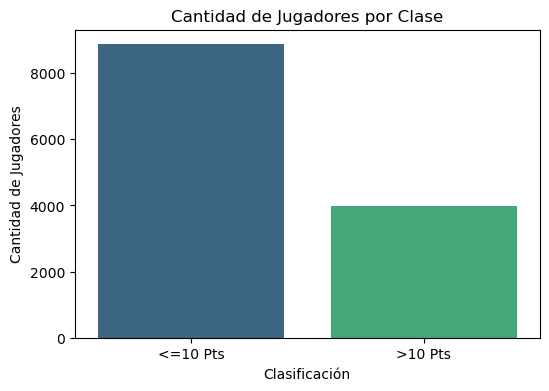

In [193]:
# Contar cuántos jugadores hay en cada claseÇ
class_counts = dataset_filled['classification'].value_counts()

print("Cantidad de jugadores por clase:")
print(f"Jugadores con <=10 Pts: {class_counts[0]}")
print(f"Jugadores con >10 Pts: {class_counts[1]}")

plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.xticks([0, 1], labels=["<=10 Pts", ">10 Pts"])
plt.xlabel("Clasificación")
plt.ylabel("Cantidad de Jugadores")
plt.title("Cantidad de Jugadores por Clase")
plt.show()



- **Jugadores con <=10 Pts:** 8,873 (70% del dataset).
- **Jugadores con >10 Pts:** 3,971 (30% del dataset).

Esto muestra un **desbalance de clases**, ya que hay más jugadores en la categoría `<=10 Pts`. Esto es importante porque los modelos de clasificación suelen favorecer la clase mayoritaria. Es algo a tener en cuenta al interpretar los resultados.


Correlaciones con la clasificación (<=10 Pts vs >10 Pts):
classification    1.000000
pts               0.825385
ast               0.561279
usg_pct           0.526655
reb               0.521636
gp                0.412725
ts_pct            0.247883
draft_number     -0.372242
Name: classification, dtype: float64


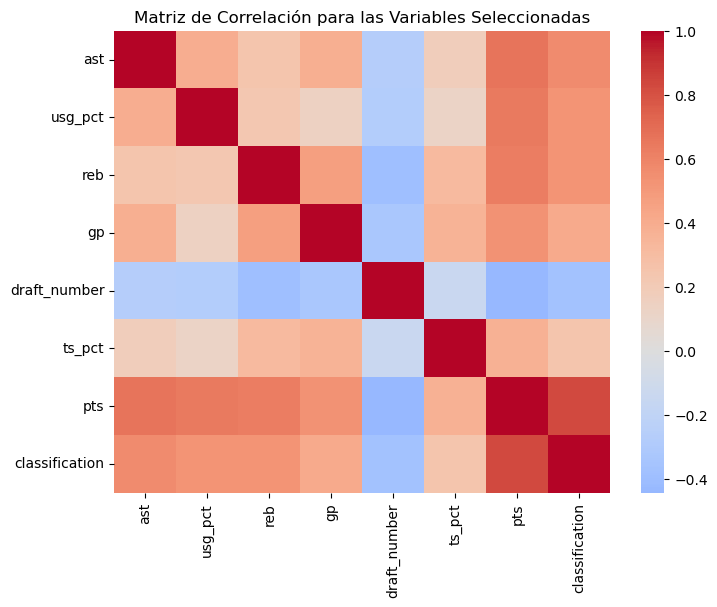

In [191]:
# Calcular la matriz de correlación
correlation_with_class = dataset_filled.corr()['classification'].sort_values(ascending=False)

# Mostrar las correlaciones
print("Correlaciones con la clasificación (<=10 Pts vs >10 Pts):")
print(correlation_with_class)

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(dataset_filled.corr(), annot=False, cmap='coolwarm', center=0)
plt.title("Matriz de Correlación para las Variables Seleccionadas")
plt.show()


Resultados para el dataset con datos eliminados:
[[2159  209]
 [ 354  746]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      2368
           1       0.78      0.68      0.73      1100

    accuracy                           0.84      3468
   macro avg       0.82      0.79      0.81      3468
weighted avg       0.83      0.84      0.83      3468



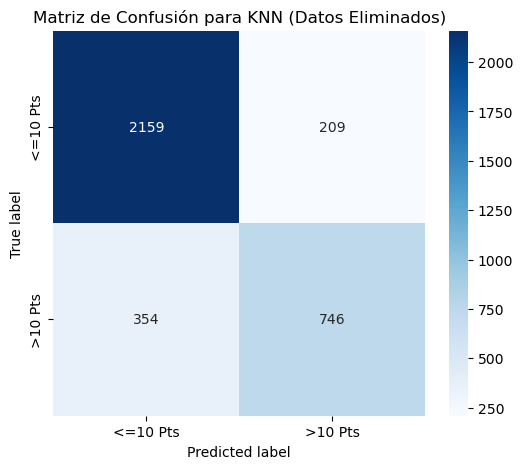

In [188]:
# Dividir los datos en entrenamiento y prueba
X_no_missing = dataset_no_missing.drop(columns=['classification', 'pts'])
y_no_missing = dataset_no_missing['classification']

X_train_no_missing, X_test_no_missing, y_train_no_missing, y_test_no_missing = train_test_split(
    X_no_missing, y_no_missing, test_size=0.3, random_state=42
)


# Crear y entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_no_missing, y_train_no_missing)

# Predicciones
y_pred_no_missing = knn.predict(X_test_no_missing)

# Matriz de confusión y métricas
print("Resultados para el dataset con datos eliminados:")
print(confusion_matrix(y_test_no_missing, y_pred_no_missing))
print(classification_report(y_test_no_missing, y_pred_no_missing))

# Matriz de confusión
conf_matrix_no_missing = confusion_matrix(y_test_no_missing, y_pred_no_missing)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_no_missing, annot=True, fmt='d', cmap='Blues',
            xticklabels=['<=10 Pts', '>10 Pts'], yticklabels=['<=10 Pts', '>10 Pts'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Matriz de Confusión para KNN (Datos Eliminados)')
plt.show()


#### **Métricas**
- **Precisión (Precision):**
  - Clase `<=10 Pts` (0): 86% de los predichos como `<=10 Pts` son correctos.
  - Clase `>10 Pts` (1): 78% de los predichos como `>10 Pts` son correctos.
- **Recall (Sensibilidad):**
  - Clase `<=10 Pts` (0): 91% de los jugadores con `<=10 Pts` fueron correctamente identificados.
  - Clase `>10 Pts` (1): 68% de los jugadores con `>10 Pts` fueron correctamente identificados.
- **F1-Score:**
  - Clase `<=10 Pts` (0): 0.88, lo que refleja un buen balance entre precisión y recall.
  - Clase `>10 Pts` (1): 0.73, menor debido al desbalance de clases.
- **Accuracy (Exactitud):** 84%, lo que indica un buen desempeño global.

### ¿La matriz de confusión tiene sentido?

- **Verdaderos Negativos (TN):** 2,159 (jugadores correctamente clasificados como `<=10 Pts`).
- **Falsos Positivos (FP):** 209 (jugadores predichos como `>10 Pts`, pero realmente son `<=10 Pts`).
- **Falsos Negativos (FN):** 354 (jugadores predichos como `<=10 Pts`, pero realmente son `>10 Pts`).
- **Verdaderos Positivos (TP):** 746 (jugadores correctamente clasificados como `>10 Pts`).

Sí, la matriz de confusión tiene sentido:
1. **Desempeño esperado para cada clase:**
   - El modelo clasifica mejor la clase mayoritaria (`<=10 Pts`), lo cual es coherente debido al desbalance de clases.
   - La clase minoritaria (`>10 Pts`) tiene un menor recall (68%), lo cual es común en este tipo de situaciones.
2. **Errores razonables:**
   - Los falsos positivos (209) y falsos negativos (354) no son excesivamente altos, lo que indica que el modelo está capturando relaciones útiles en los datos.

Por lo tanto, la matriz refleja un comportamiento lógico del modelo dentro del contexto del problema.

Resultados para el dataset con datos rellenados:
[[2443  242]
 [ 355  814]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      2685
           1       0.77      0.70      0.73      1169

    accuracy                           0.85      3854
   macro avg       0.82      0.80      0.81      3854
weighted avg       0.84      0.85      0.84      3854



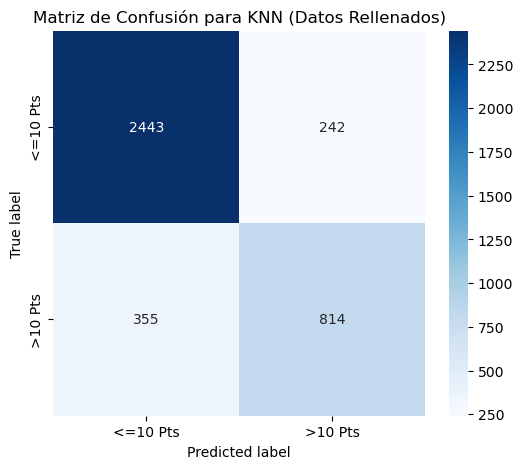

In [189]:
# Dividir los datos en entrenamiento y prueba
X_filled = dataset_filled.drop(columns=['classification', 'pts'])
y_filled = dataset_filled['classification']

X_train_filled, X_test_filled, y_train_filled, y_test_filled = train_test_split(
    X_filled, y_filled, test_size=0.3, random_state=42
)

# Crear y entrenar el modelo KNN
knn_filled = KNeighborsClassifier(n_neighbors=5)
knn_filled.fit(X_train_filled, y_train_filled)

# Predicciones
y_pred_filled = knn_filled.predict(X_test_filled)

# Matriz de confusión y métricas
print("Resultados para el dataset con datos rellenados:")
print(confusion_matrix(y_test_filled, y_pred_filled))
print(classification_report(y_test_filled, y_pred_filled))

# Matriz de confusión
conf_matrix_filled = confusion_matrix(y_test_filled, y_pred_filled)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_filled, annot=True, fmt='d', cmap='Blues',
            xticklabels=['<=10 Pts', '>10 Pts'], yticklabels=['<=10 Pts', '>10 Pts'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Matriz de Confusión para KNN (Datos Rellenados)')
plt.show()


### Resultados para el dataset con datos rellenados

#### **Matriz de Confusión**
- **Verdaderos Negativos (TN):** 2,443 (jugadores correctamente clasificados como `<=10 Pts`).
- **Falsos Positivos (FP):** 242 (jugadores predichos como `>10 Pts`, pero realmente son `<=10 Pts`).
- **Falsos Negativos (FN):** 355 (jugadores predichos como `<=10 Pts`, pero realmente son `>10 Pts`).
- **Verdaderos Positivos (TP):** 814 (jugadores correctamente clasificados como `>10 Pts`).

#### **Métricas**
- **Precisión:**
  - Clase `<=10 Pts` (0): 87% de los predichos como `<=10 Pts` son correctos.
  - Clase `>10 Pts` (1): 77% de los predichos como `>10 Pts` son correctos.
- **Recall:**
  - Clase `<=10 Pts` (0): 91% de los jugadores con `<=10 Pts` fueron correctamente identificados.
  - Clase `>10 Pts` (1): 70% de los jugadores con `>10 Pts` fueron correctamente identificados.
- **F1-Score:**
  - Clase `<=10 Pts` (0): 0.89, reflejando un buen balance entre precisión y recall.
  - Clase `>10 Pts` (1): 0.73, ligeramente menor debido al desbalance de clases.
- **Accuracy (Exactitud):** 85%, mostrando un buen desempeño general.

#### **Comentarios**
- El modelo clasifica mejor la clase `<=10 Pts`, como es esperable dado el desbalance de clases.
- Aunque el recall para la clase `>10 Pts` es menor (70%), el modelo captura más casos correctamente que en la clase minoritaria.
- Los errores (FP y FN) están dentro de un rango razonable, indicando que el modelo funciona bien con los datos rellenados.


Resultados para el dataset original:
[[2422  249]
 [ 376  807]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      2671
           1       0.76      0.68      0.72      1183

    accuracy                           0.84      3854
   macro avg       0.81      0.79      0.80      3854
weighted avg       0.83      0.84      0.84      3854



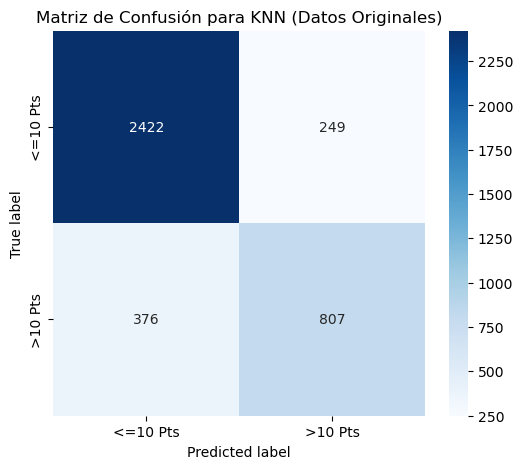

In [190]:
# Dividir los datos en entrenamiento y prueba
X_original = dataset_original.drop(columns=['classification', 'pts'])
y_original = dataset_original['classification']

X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(
    X_original, y_original, test_size=0.3, random_state=42
)

# Crear y entrenar el modelo KNN
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train_original, y_train_original)

# Predicciones
y_pred_original = knn_original.predict(X_test_original)

# Matriz de confusión y métricas
print("Resultados para el dataset original:")
print(confusion_matrix(y_test_original, y_pred_original))
print(classification_report(y_test_original, y_pred_original))

# Matriz de confusión
conf_matrix_original = confusion_matrix(y_test_original, y_pred_original)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_original, annot=True, fmt='d', cmap='Blues',
            xticklabels=['<=10 Pts', '>10 Pts'], yticklabels=['<=10 Pts', '>10 Pts'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Matriz de Confusión para KNN (Datos Originales)')
plt.show()


### Resultados para el dataset original

#### **Matriz de Confusión**
- **Verdaderos Negativos (TN):** 2,422 (jugadores correctamente clasificados como `<=10 Pts`).
- **Falsos Positivos (FP):** 249 (jugadores predichos como `>10 Pts`, pero realmente son `<=10 Pts`).
- **Falsos Negativos (FN):** 376 (jugadores predichos como `<=10 Pts`, pero realmente son `>10 Pts`).
- **Verdaderos Positivos (TP):** 807 (jugadores correctamente clasificados como `>10 Pts`).

#### **Métricas**
- **Precisión:**
  - Clase `<=10 Pts` (0): 87% de los predichos como `<=10 Pts` son correctos.
  - Clase `>10 Pts` (1): 76% de los predichos como `>10 Pts` son correctos.
- **Recall:**
  - Clase `<=10 Pts` (0): 91% de los jugadores con `<=10 Pts` fueron correctamente identificados.
  - Clase `>10 Pts` (1): 68% de los jugadores con `>10 Pts` fueron correctamente identificados.
- **F1-Score:**
  - Clase `<=10 Pts` (0): 0.89, reflejando un buen balance entre precisión y recall.
  - Clase `>10 Pts` (1): 0.72, más bajo debido al desbalance de clases.
- **Accuracy (Exactitud):** 84%, mostrando un buen desempeño general.

#### **Comentarios**
- El modelo clasifica correctamente la mayoría de jugadores en la clase mayoritaria `<=10 Pts`, con buen recall y precisión.
- Para la clase `>10 Pts`, el recall es menor (68%), mostrando cierta dificultad para identificar jugadores en esta categoría.
- Los errores (FP y FN) son razonables, y el modelo se comporta bien considerando los datos originales.


### Comparación

1. **¿Cuál ofrece mejores resultados?**
   - El dataset con datos rellenados (`dataset_filled`) ofrece los mejores resultados, con una **exactitud de 85%** y mejores métricas en la clase `>10 Pts` (recall del 70% frente al 68% en el dataset original y 68% en el dataset con datos eliminados).

2. **¿Mejora el desempeño al utilizar datos 'sintéticos' generados mediante la regresión?**
   - Sí, al usar datos rellenados, el modelo mejora ligeramente su desempeño, especialmente en la clase minoritaria (`>10 Pts`), debido a que hay más datos para entrenar el modelo.

3. **¿Qué tan bien se ha comportado el algoritmo en cada caso?**
   - **Dataset con datos eliminados:** Buen desempeño general, pero pierde información debido a las filas eliminadas.
   - **Dataset con datos rellenados:** Mejor desempeño global y balanceado, ya que los datos 'sintéticos' amplían el conjunto de entrenamiento.
   - **Dataset original:** Desempeño similar al dataset con datos rellenados, pero afecta ligeramente al modelo debido a los valores faltantes.

El modelo funciona mejor con el dataset rellenado, aprovechando los datos 'sintéticos' generados para mejorar el aprendizaje.


## 5. **Conclusiones Generales**

#### Limpieza y Selección de Variables:
Se eliminaron columnas irrelevantes y se seleccionaron variables clave basadas en correlaciones y PCA. Esto ayudó a reducir dimensionalidad y enfocar el modelo en las características más relevantes.

#### Modelos de Regresión:
Se entrenaron dos modelos:
- **Regresión Lineal:** Buen desempeño, con un RMSE de 2.51 en prueba y un \(R^2\) del 83%. Sin embargo, no captura relaciones complejas.
- **Regresión Polinómica:** Mejor ajuste con un RMSE de 1.70 en prueba y un \(R^2\) del 92%. Este modelo ganó por su mayor precisión al capturar relaciones no lineales.

#### Parte Optativa - Clasificación:
Se clasificaron jugadores en función de su capacidad de anotar más o menos de 10 puntos por partido usando KNN.
- El **dataset con datos rellenados** ofreció el mejor desempeño general, aprovechando los valores "sintéticos" generados por la regresión.
- Las métricas de precisión y recall mostraron que el modelo tiene un mejor balance al incluir datos adicionales, mejorando la clasificación en la clase minoritaria (>10 Pts).

#### Comparación de Datasets:
- **Datos eliminados:** Buen desempeño, pero se pierde información valiosa.
- **Datos rellenados:** Mejor desempeño, mostrando que los datos generados son útiles.
- **Datos originales:** Resultados similares al dataset rellenado.
